In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-0

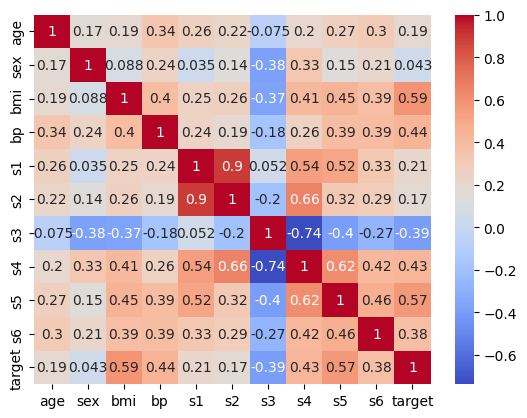

In [2]:
# Load the Diabetes dataset
diabetes = load_diabetes()

# Convert to DataFrame for easier handling
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Explore the data
print(df.head())
print(df.describe())

# Plot a heatmap of correlations
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [3]:
# Separate features (X) and target variable (y)
X = df.drop("target", axis=1)
y = df["target"]

# Feature Scaling (Optional but often helps in regression tasks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
# Initialize the Random Forest model
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 2963.013847191012
R² Score: 0.44074575666493343


In [8]:
# Perform cross-validation
scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")

# Print cross-validation results
print("Cross-Validation R² Scores:", scores)
print("Mean Cross-Validation R² Score:", np.mean(scores))

Cross-Validation R² Scores: [0.38297081 0.52346414 0.42902214 0.35392366 0.41332622]
Mean Cross-Validation R² Score: 0.4205413951875282


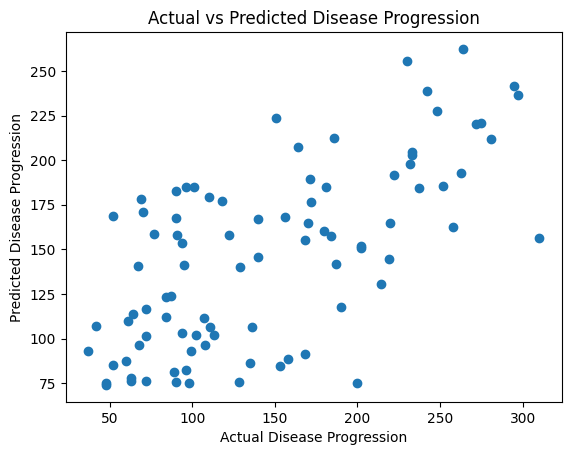

In [9]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Actual vs Predicted Disease Progression")
plt.show()